In [125]:
import visa
import numpy as np
import time
import matplotlib.pyplot as plt
import sounddevice as sd

class PlacaAudio:
    sampling_frequency=48000
    channels = 2
    def get_audio_and_plot_it(self,duration = 2):
        N = int(duration*self.sampling_frequency)
        data_heard = sd.rec(N, samplerate=self.sampling_frequency, channels=2)
        sd.wait()
        t=np.arange(0,duration,1/self.sampling_frequency)
        plt.plot(t,data_heard)
        plt.show()
    def get_audio_tf_and_plot_it(self,duration = 2):
        N = int(duration*self.sampling_frequency)
        data_heard = sd.rec(N, samplerate=self.sampling_frequency, channels=2)
        sd.wait()
        X0 = np.fft.fftshift(np.fft.fft(data_heard[:,0])/N)
        X1 = np.fft.fftshift(np.fft.fft(data_heard[:,1])/N)
        T=1/self.sampling_frequency
        f = np.arange(-1/(2*T),1/(2*T),1/(N*T))
        plt.plot(f,np.abs(X0))
        plt.show()
        
    def generate_sine(self, frequency, duration):
        sample = self.sampling_frequency*duration/frequency
        x = np.arange(sample)
        sinArray = np.sin(2*np.pi*frequency*x/self.sampling_frequency)
        return sinArray
    def generate_ramp(self, frequency, duration):
        rampArray = np.arange(self.sampling_frequency*duration/frequency)
        return rampArray
    def play(self, data):
        sd.play(data, self.sampling_frequency)
    def create_random_sound(self, duration):
        arrayRandom = [random.uniform(-10,10) for i in np.arange(0, self.sampling_frequency*duration)]
        return np.asarray(arrayRandom)
    def stop(self):
        sd.stop()
    def set_samplerate(self, sampling_frequency):
        self.sampling_frequency = sampling_frequency
        
        
    def record_sound(self, duration):
        myrecording = sd.rec(duration * self.sampling_frequency, samplerate=self.sampling_frequency, channels=self.channels)
        return myrecording
    
    
    def record_and_play(self, data):
        myrecording = sd.playrec(data, self.samplerate, self.channels)
        return myrecording

In [126]:
creemo = PlacaAudio()

In [ ]:
data = creemo.generate_sine(2,10000)
creemo.play(data)

In [124]:
creemo.stop()

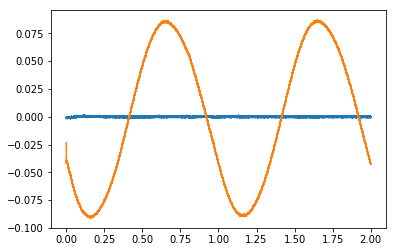

In [63]:
escuchemo = PlacaAudio()
escuchemo.get_audio_and_plot_it()

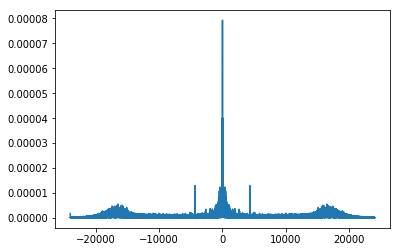

In [64]:
escuchemo.get_audio_tf_and_plot_it()